<a href="https://colab.research.google.com/github/Harshith2005pendela/Harshith2005pendela/blob/main/EE325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df = pd.read_csv('JEEDemographics.csv')
state_info = pd.read_csv('StateInfo.csv')
df
print(state_info)

                State  Population  GSDP\n(million rs)  GSDP \n(billion $)  \
0      Andhra Pradesh    49577103          11338365.0               152.2   
1               Bihar   104099452           6503024.3                87.3   
2        Chhattisgarh    25545198           4064158.2                54.6   
3                 Goa     1458545            826037.0                11.1   
4             Gujarat    60439692          19770664.6               265.4   
5             Haryana    25351462           8706645.3               116.9   
6    Himachal Pradesh     6864602           1762694.7                23.7   
7           Jharkhand    32988134           3588625.9                48.1   
8           Karnataka    61095297          19627254.2               263.5   
9              Kerala    33406061           9324699.6               125.2   
10     Madhya Pradesh    72626809          11361371.9               152.5   
11        Maharashtra   112374333          31080218.7               417.2   

In [4]:
# taking the first k students as a sample
def firstksamples(df,k) :
  df_new = df[:k]
  return df_new

# selecting a arbitrary student and k students in numbering after that student
def arbitraryk(df,k) :
  df_new = df.sample(n=k)
  return df_new

# random k students
def randomk(df,k) :
  start_point = random.randint(0, len(df) - k)
  df_new = df[start_point:start_point+k]
  return df_new

In [64]:
k_values =[10,20,50,100,200]
num_experiments = 50


{10: {'firstksamples': {'state1pred': 'MH', 'state2pred': 'BR', 'state3pred': 'TL', 'AvgFrac': 0.6999999999999998}, 'arbitraryk': {'state1pred': 'MH', 'state2pred': 'RJ', 'state3pred': 'AP', 'AvgFrac': 0.6220000000000002}, 'randomk': {'state1pred': 'MH', 'state2pred': 'RJ', 'state3pred': 'UP', 'AvgFrac': 0.6359999999999999}}, 20: {'firstksamples': {'state1pred': 'MH', 'state2pred': 'TL', 'state3pred': 'BR', 'AvgFrac': 0.6000000000000005}, 'arbitraryk': {'state1pred': 'MH', 'state2pred': 'TL', 'state3pred': 'AP', 'AvgFrac': 0.544}, 'randomk': {'state1pred': 'MH', 'state2pred': 'RJ', 'state3pred': 'TL', 'AvgFrac': 0.5720000000000001}}, 50: {'firstksamples': {'state1pred': 'MH', 'state2pred': 'TL', 'state3pred': 'AP', 'AvgFrac': 0.6200000000000003}, 'arbitraryk': {'state1pred': 'MH', 'state2pred': 'RJ', 'state3pred': 'AP', 'AvgFrac': 0.5084000000000001}, 'randomk': {'state1pred': 'MH', 'state2pred': 'RJ', 'state3pred': 'TL', 'AvgFrac': 0.5148}}, 100: {'firstksamples': {'state1pred': 'MH',

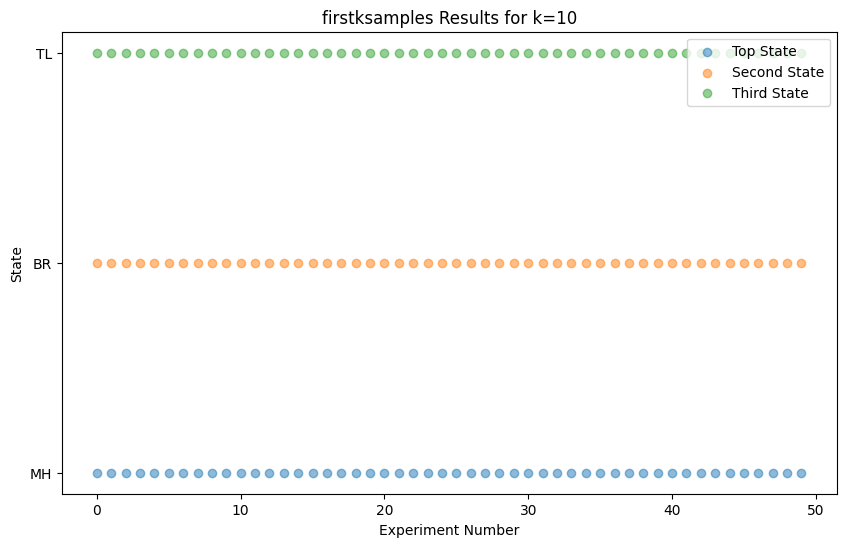

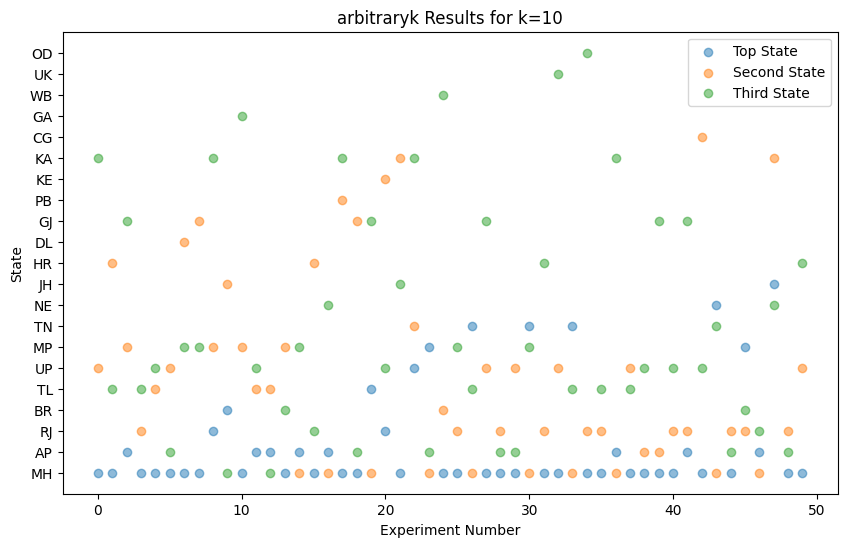

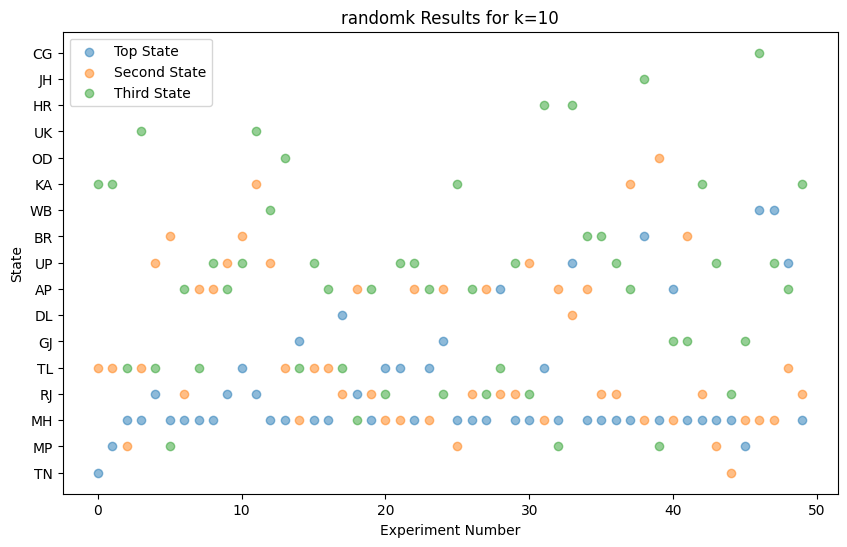

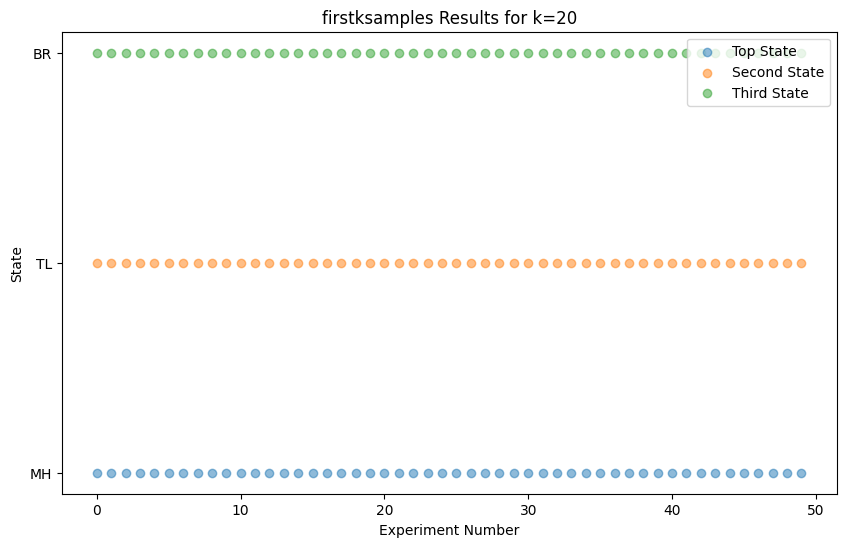

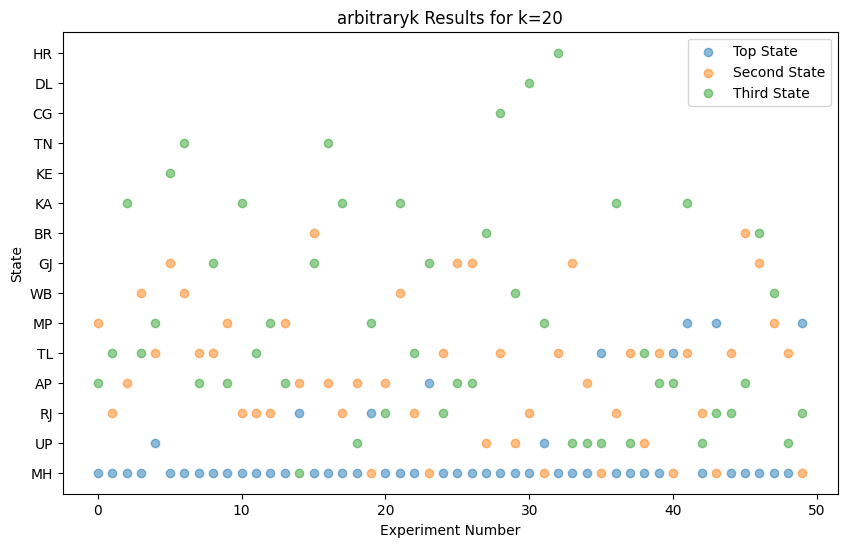

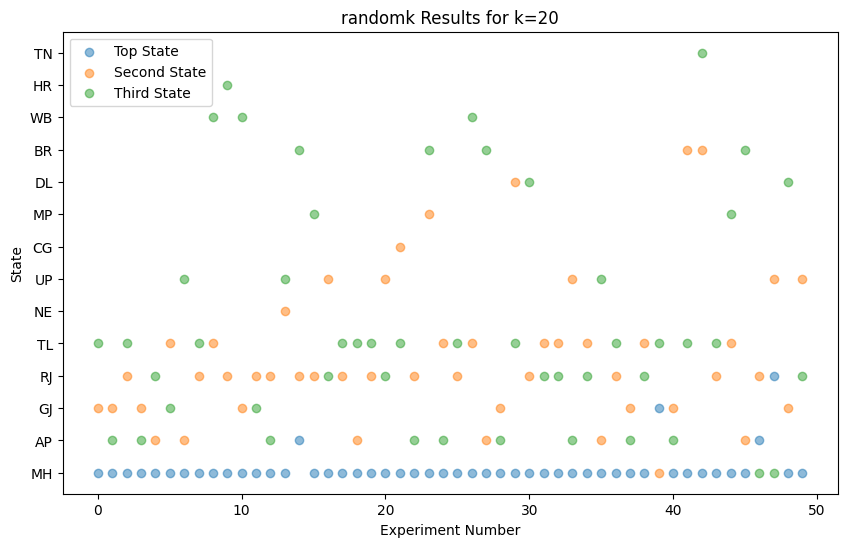

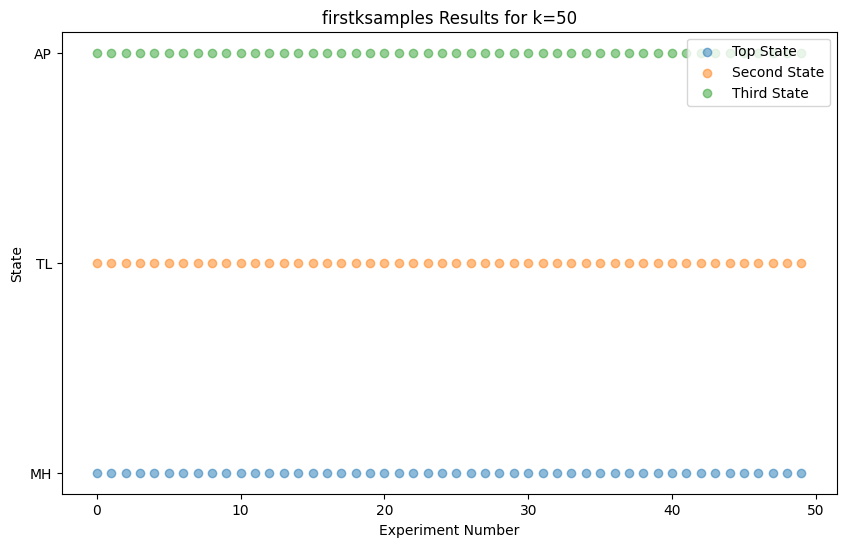

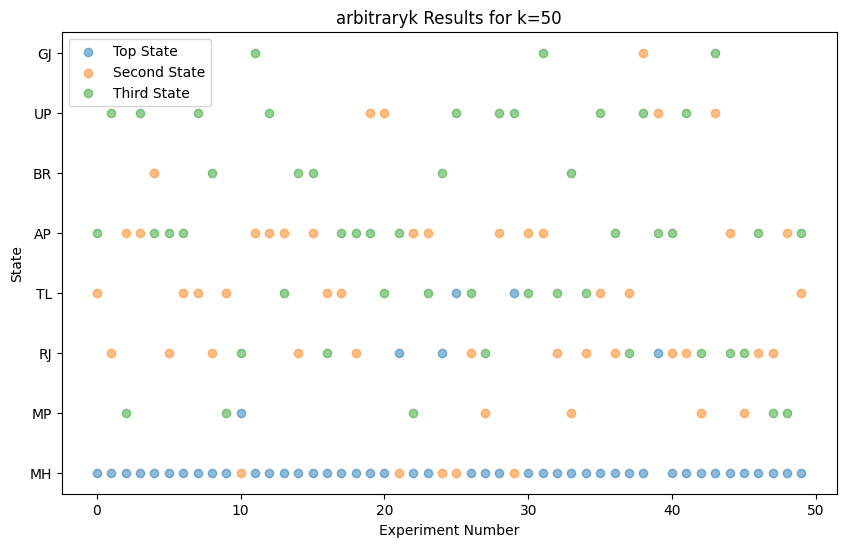

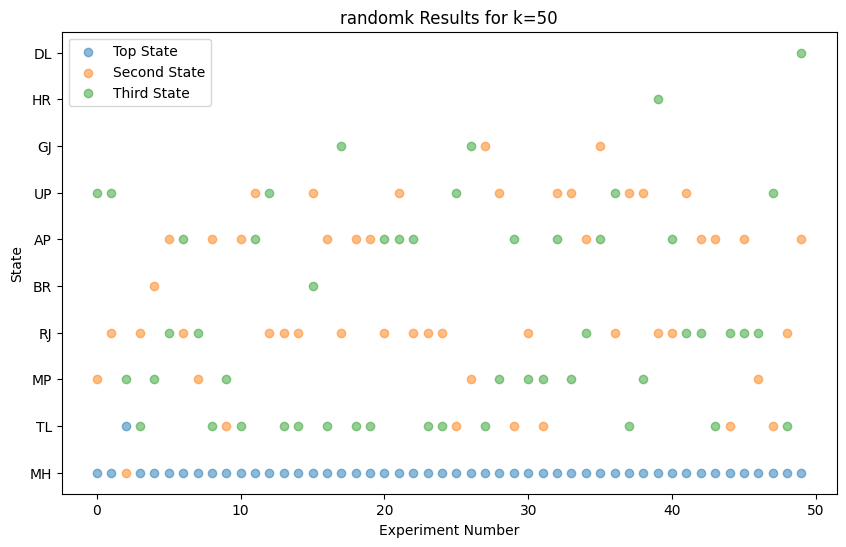

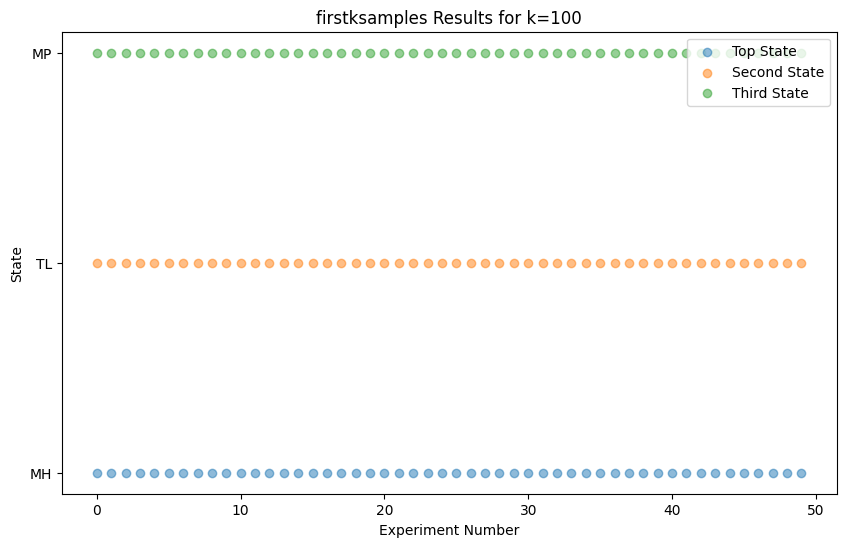

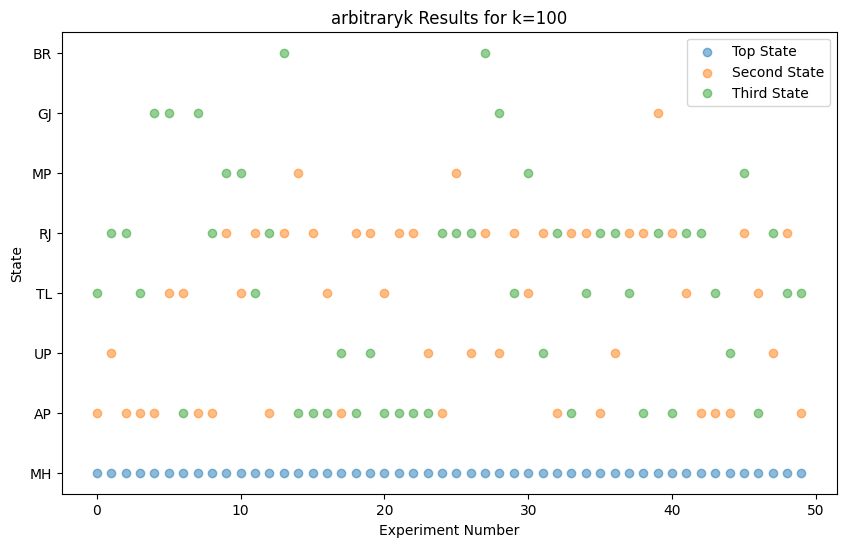

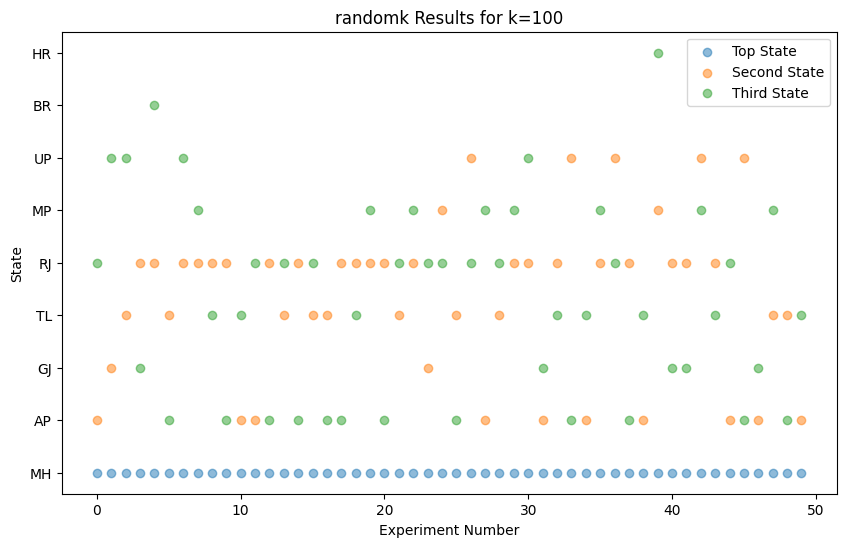

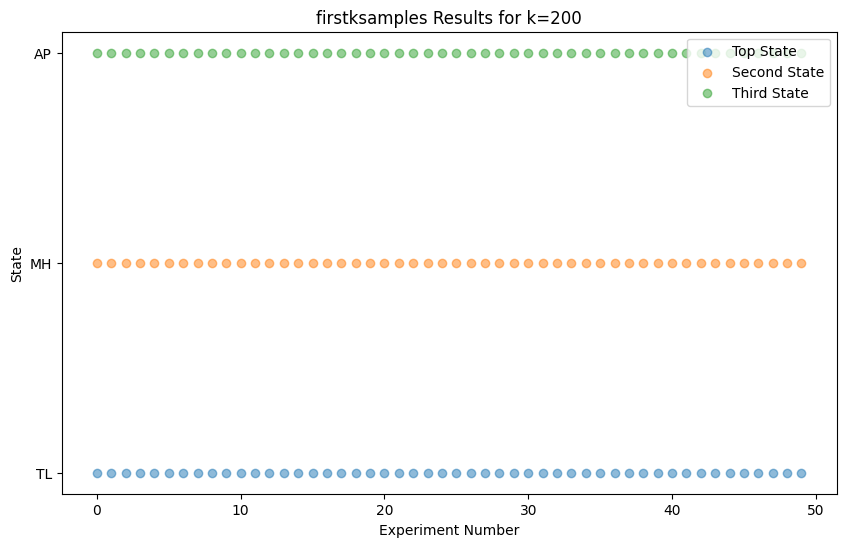

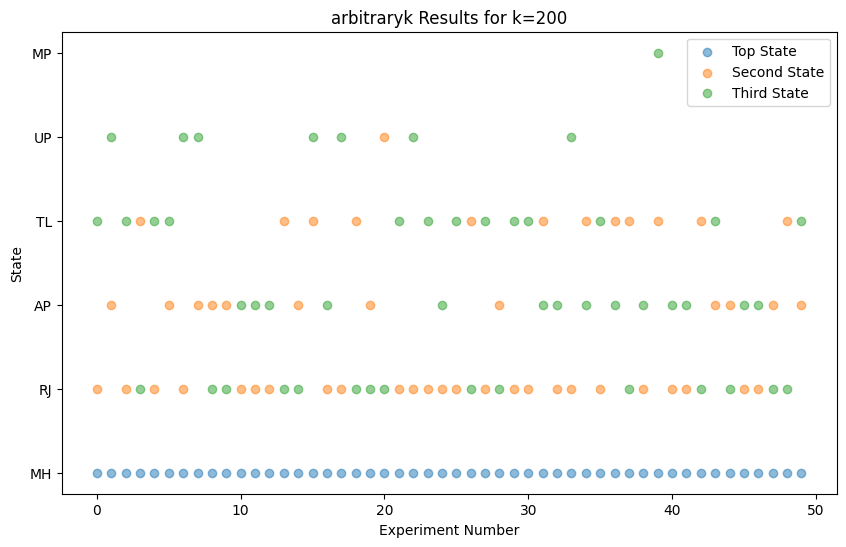

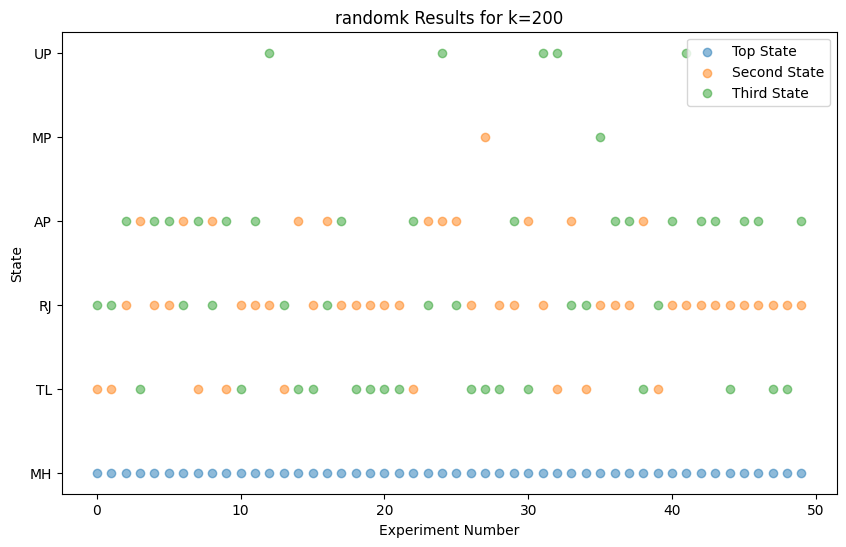

In [72]:
from collections import Counter
# Initialize results dictionary with method-specific tracking
results = {k: {'firstksamples': {'state1': [], 'state2': [], 'state3': [], 'Frac': []},
               'arbitraryk': {'state1': [], 'state2': [], 'state3': [], 'Frac': []},
               'randomk': {'state1': [], 'state2': [], 'state3': [], 'Frac': []}
              } for k in k_values}

# Loop over each k value and sampling method
for k in k_values:
    for method_name, method_func in [('firstksamples', firstksamples),
                                     ('arbitraryk', arbitraryk),
                                     ('randomk', randomk)]:

        for o in range(num_experiments):
            df_new = method_func(df, k)

            # Calculate the top 3 states and their fractions
            origin_counts = df_new['Origin'].value_counts()
            top3states = origin_counts.head(3)
            top3fraction = top3states / len(df_new)
            total_frac = top3fraction.sum()

            # Append the results to the appropriate method-specific lists in the results dictionary
            results[k][method_name]['state1'].append(top3states.index[0])
            results[k][method_name]['state2'].append(top3states.index[1])
            results[k][method_name]['state3'].append(top3states.index[2])
            results[k][method_name]['Frac'].append(total_frac)


# Plot the results
method_test ={k: {'firstksamples': {'state1pred': [], 'state2pred': [], 'state3pred': [], 'AvgFrac': []},
               'arbitraryk': {'state1pred': [], 'state2pred': [], 'state3pred': [], 'AvgFrac': []},
               'randomk': {'state1pred': [], 'state2pred': [], 'state3pred': [], 'AvgFrac': []}
              } for k in k_values}
for k in k_values:
    for method_name in ['firstksamples', 'arbitraryk', 'randomk']:
      count_1 = Counter(results[k][method_name]['state1'])
      count_2 = Counter(results[k][method_name]['state2'])
      count_3 = Counter(results[k][method_name]['state3'])
            # Calculate the sum of values
      total_fracsum = sum(results[k][method_name]['Frac'])

      # Count the number of values
      count = len(results[k][method_name]['Frac'])
      method_test[k][method_name]['AvgFrac'] = total_fracsum / count

        # Find the element with the maximum frequency
      method_test[k][method_name]['state1pred'] = count_1.most_common(1)[0][0]
      method_test[k][method_name]['state2pred'] = count_2.most_common(1)[0][0]
      method_test[k][method_name]['state3pred'] = count_3.most_common(1)[0][0]

print(method_test)
for k in k_values:
    for method_name in ['firstksamples', 'arbitraryk', 'randomk']:
        plt.figure(figsize=(10, 6))
        # Plot each state for the current method
        indices = list(range(num_experiments))
        plt.scatter(indices, results[k][method_name]['state1'], label='Top State', alpha=0.5)
        plt.scatter(indices, results[k][method_name]['state2'], label='Second State', alpha=0.5)
        plt.scatter(indices, results[k][method_name]['state3'], label='Third State', alpha=0.5)

        plt.title(f'{method_name} Results for k={k}')
        plt.xlabel('Experiment Number')
        plt.ylabel('State')
        plt.legend()
        plt.show()
